<a href="https://colab.research.google.com/github/shuyanxiong/test_data/blob/main/test_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clean Everything
!kill -9 -1

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from google.colab import files
# uploaded = files.upload()

## **Upload Data from Github**

In [2]:
# reading csv file from url
df_Farady = pd.read_csv('https://raw.githubusercontent.com/shuyanxiong/test_data/main/ebkp%20from%20farady.csv',sep=";") 
df_Catalogue = pd.read_csv('https://raw.githubusercontent.com/shuyanxiong/test_data/main/Catalogue_K.csv',sep=';') 

# set column names
df_Farady.columns=['Element','EBKP2','KBOB_ID']
df_Farady=df_Farady.set_index('EBKP2')

# check data
df_Farady.describe()
df_Farady.head()

# result = df1.join(df2, on='EBKP2')
# result.head()

,Element,KBOB_ID
EBKP2,,
C01.02,Polyethylen film,9.007
C01.02,Foam glass gravel,10.013
C01.02,Ground insulation (PIR),10.006
C01.03,Concrete,1.003
C01.03,Steel armature,6.003


## **Upload KBOB data**

In [3]:
# del df_KBOB
# upload KBOB data
df_KBOB = pd.read_csv('https://raw.githubusercontent.com/shuyanxiong/test_data/main/KBOB%20modified.csv',sep=";") 
df_KBOB.head()

,KBOB_ID,Construction_Type,Material_Category,CONSTRUCTION_MATERIALS,Type,Density/mass per unit area,Relation,UBP,renewable primary energy kWh oil eq,non-renewable (embodied energy) primary energy kWh oil eq,greenhouse gas emissions kg CO2-eq,biogenic carbon kg C
0,0.001,Excavation securing,concrete,"Construction pit securing, bored pile wall, sp...","Disposal, construction pit securing, bored pil...",-,m2,1’390’000,134.0,2230.0,911.0,0.0
1,0.002,Excavation securing,concrete,"Excavation securing, bored pile wall, unanchored","Disposal, construction pit securing, bored pil...",-,m2,1’320’000,120.0,2040.0,872.0,0.0
2,0.003,Excavation securing,concrete,"Construction pit securing, bored pile wall, an...","Disposal, construction pit securing, bored pil...",-,m2,1’000’000,111.0,1570.0,620.0,0.0
3,0.004,Excavation securing,concrete,"Excavation securing, nail wall","Disposal, excavation securing, wall of nails",-,m2,222’000,24.0,336.0,140.0,0.0
4,0.005,Excavation securing,concrete,"Excavation pit protection, retaining wall, can...","Disposal, construction pit securing, retaining...",-,m2,447’000,108.0,886.0,276.0,0.0


In [4]:
# set column names
df_Catalogue.columns=['Construction','EBKP1','EBKP2','Component','KBOB_Keyword']

# dropping null value columns to avoid errors
df_Catalogue.dropna(inplace=True)

# set index
# df_Catalogue=df_Catalogue.set_index('KBOB_Keyword')

df_Catalogue.head()

,Construction,EBKP1,EBKP2,Component,KBOB_Keyword
0,ROOF,C4.4. Roof,C04.04,Construction flat roof,roof
1,ROOF,F1. Roof covering,F01.01,Roof waterproofing under,vapor barrier
2,ROOF,F1. Roof covering,F01.02,terrain roofing flat roof,Sealing membrane
3,ROOF,F1. Roof covering,F01.03,Roofing pitched roof,roof covering
4,ROOF,F1. Roof covering,F01.04,system roof,systems


## **Cross-join catalogue with KBOB by construction type**

In [5]:

# substring to be searched
# sub ='roof'
# df_KBOB[df_KBOB['Construction_Type'].str.contains("|".join(sub))]
 
# creating and passing series to new column
# data["Indexes"]= data["Name"].str.find(sub)
 
# display
# data

# create dummy column
df_Catalogue['join'] = 1
df_KBOB['join'] = 1

dfFull = df_Catalogue.merge(df_KBOB, on='join').drop('join', axis=1)
dfFull['Construction_Type']=dfFull['Construction_Type'].str.lower()
dfFull['KBOB_Keyword']=dfFull['KBOB_Keyword'].str.lower()
df_KBOB.drop('join', axis=1, inplace=True)

# add a new column in the result DataFrame returning if the KBOB_Keyword column is in the Construction_Type column.
dfFull['match'] = dfFull.apply(lambda x: x.Construction_Type.find(x.KBOB_Keyword), axis=1).ge(0)
dfFull = dfFull[dfFull.match]
dfFull.head()

# contain_values = dfFull[dfFull['Construction_Type'].str.contains('window')]
# print (contain_values)


,Construction,EBKP1,EBKP2,Component,KBOB_Keyword,KBOB_ID,Construction_Type,Material_Category,CONSTRUCTION_MATERIALS,Type,Density/mass per unit area,Relation,UBP,renewable primary energy kWh oil eq,non-renewable (embodied energy) primary energy kWh oil eq,greenhouse gas emissions kg CO2-eq,biogenic carbon kg C,match
24,ROOF,C4.4. Roof,C04.04,Construction flat roof,roof,1.001,"wall, roof, floor slab, platform, staircase, c...",concrete,lean concrete (without reinforcement),"disposal, concrete",2’150,kg,105,0.010,0.129,0.063,0.0,True
25,ROOF,C4.4. Roof,C04.04,Construction flat roof,roof,1.002,"wall, roof, floor slab, platform, staircase, c...",concrete,High-rise concrete (without reinforcement),"disposal, concrete",2’300,kg,154,0.015,0.175,0.101,0.0,True
26,ROOF,C4.4. Roof,C04.04,Construction flat roof,roof,1.003,"wall, roof, floor slab, platform, staircase, c...",concrete,civil engineering concrete (without reinforcem...,"disposal, concrete",2’350,kg,164,0.016,0.189,0.109,0.0,True
27,ROOF,C4.4. Roof,C04.04,Construction flat roof,roof,1.004,"wall, roof, floor slab, platform, staircase, c...",concrete,Bored pile concrete (without reinforcement),"disposal, concrete",2’325,kg,175,0.017,0.198,0.119,0.0,True
28,ROOF,C4.4. Roof,C04.04,Construction flat roof,roof,1.041,"wall, roof, floor slab, platform, staircase, c...",concrete,"Precast concrete part, high-strength concrete,...","disposal, concrete",2’770,kg,589,0.082,0.871,0.358,0.0,True


In [ ]:
#@title
# # do a groupby function and get the match's maximum to filter.
# dfResult = dfFull.groupby(['Construcion','Construction_Type', 'Material_Category']).max().reset_index()[['Construcion','Construction_Type','Material_Category','match']]
# dfResult = dfResult[dfResult.match]
# dfResult.head()

## **Generate LOD 1**

In [6]:
construction_L1 = dfFull.Construction.T.drop_duplicates().T.to_numpy()
construction_L1

array(['ROOF', 'INTERIOR WALL', 'PARTITION WALL', 'CEILING',
       'EXTERIOR WALL UNDER GROUND', 'WINDOW', 'BALCONY',
       'EXTERIOR WALL ABOVE GROUND', 'FOUNDATION'], dtype=object)

## **Select one building element from LOD1 to create Signature Table**

In [10]:

#@title Raw fields

Building_Element = 'CEILING' #@param ['ROOF', 'INTERIOR WALL', 'PARTITION WALL', 'CEILING','EXTERIOR WALL UNDER GROUND', 'WINDOW', 'BALCONY','EXTERIOR WALL ABOVE GROUND', 'FOUNDATION']
print(Building_Element)


CEILING


In [11]:

# creating a bool series from isin()
new = dfFull.Construction.str.contains(Building_Element)
  
# displaying data with Building_Element from input only
dfsig=dfFull[new]


In [14]:
sig = dfsig.groupby(['Construction','EBKP1','EBKP2','Component','KBOB_Keyword','KBOB_ID','Material_Category','CONSTRUCTION_MATERIALS']).\
max().reset_index()[['Construction','EBKP1','EBKP2','Component','KBOB_Keyword','KBOB_ID','Material_Category','CONSTRUCTION_MATERIALS','match']]
sig = sig[sig.match]
sig.columns = sig.columns.str.replace(' ','_')
sig.head()

,Construction,EBKP1,EBKP2,Component,KBOB_Keyword,KBOB_ID,Material_Category,CONSTRUCTION_MATERIALS,match
0,CEILING,C4.1. Ceiling,C04.01,floor,floor slab,01.043.01,concrete,"Hempcrete, ARBIO",True
1,CEILING,C4.1. Ceiling,C04.01,floor,floor slab,1.001,concrete,lean concrete (without reinforcement),True
2,CEILING,C4.1. Ceiling,C04.01,floor,floor slab,1.002,concrete,High-rise concrete (without reinforcement),True
3,CEILING,C4.1. Ceiling,C04.01,floor,floor slab,1.003,concrete,civil engineering concrete (without reinforcem...,True
4,CEILING,C4.1. Ceiling,C04.01,floor,floor slab,1.004,concrete,Bored pile concrete (without reinforcement),True


## **Generate LOD 2 - LOD 5 accordingly**

In [ ]:
# get list of items for different columns
construction_L2 = sig.EBKP1.T.drop_duplicates().T.to_numpy()
# convert list to string
construction_L2 = ','.join(map(str, construction_L2))

## You can extend this to more complicated use cases using a function.
# def try_join(l):
#     try:
#         return ','.join(map(str, l))
#     except TypeError:
#         return np.nan

# df['liststring'] = [try_join(l) for l in df['lists']]

# repeat the above steps
construction_L3 = sig.Component.T.drop_duplicates().T.to_numpy()
construction_L3 = ','.join(map(str, construction_L3))

construction_L4 = sig.Material_Category.T.drop_duplicates().T.to_numpy()
construction_L4 = ','.join(map(str, construction_L4))

# try to separate specific materials into 2 levels by frequency of use
# probably need modification of methodology
construction_L5_1= sig.CONSTRUCTION_MATERIALS.value_counts(normalize=True).index.tolist()[:5]
construction_L5_1 = ','.join(map(str, construction_L5_1))

construction_L5_2= sig.CONSTRUCTION_MATERIALS.value_counts(normalize=True).index.tolist()[:10]
construction_L5_2 = ','.join(map(str, construction_L5_2))
# construction_L5_2 = sig.CONSTRUCTION_MATERIALS.T.drop_duplicates().T.to_numpy()
construction_L5_2

## **Construct the Signature Table of each building element**

In [ ]:
card = pd.DataFrame([['0 Strategic definition', 'Preparation & briefing','2 Concept design','3 Spatial coordination','4 Technical design','5 Manufacturing & construction'],\
            ['Pre-LOD Masses disposition','LOD 100 Conceptual design','LOD 200 Approximate design','LOD 300 Precise design','LOD 400 Fabrication','LOD 500 As built'],\
            ['2.5D surfaces','3D generic representation','Approximate quantity, size, shape, location','Accurate quantity,size, shape, location','Detailing and installation information','Representation of field components'],\
            ['None','None','Non-graphic information','Non-graphic information','Non-graphic information','Non-graphic information'],\
            ['Main group','Element','Component material','Component material','Material as planned for fabrication','Material as built'],\
            [Building_Element,construction_L2,construction_L3,construction_L4,construction_L5_1,construction_L5_2],[np.nan*6]],
            index=pd.Index(['Design stages','LOD stage','LOG','LOI','BIM Structure','Building element','Visual aspect']),\
            columns=['Simplified component-based approach','Simplified component-based approach','Simplified component-based approach','Detailed material-based approach','Detailed material-based approach','Detailed material-based approach'])
card
card.style.format(precision=0, na_rep='MISSING')

,Simplified component-based approach,Simplified component-based approach,Simplified component-based approach,Detailed material-based approach,Detailed material-based approach,Detailed material-based approach
Design stages,0 Strategic definition,Preparation & briefing,2 Concept design,3 Spatial coordination,4 Technical design,5 Manufacturing & construction
LOD stage,Pre-LOD Masses disposition,LOD 100 Conceptual design,LOD 200 Approximate design,LOD 300 Precise design,LOD 400 Fabrication,LOD 500 As built
LOG,2.5D surfaces,3D generic representation,"Approximate quantity, size, shape, location","Accurate quantity,size, shape, location",Detailing and installation information,Representation of field components
LOI,None,None,Non-graphic information,Non-graphic information,Non-graphic information,Non-graphic information
BIM Structure,Main group,Element,Component material,Component material,Material as planned for fabrication,Material as built
Building element,CEILING,"C4.1. Ceiling,G2. Floor covering,G4. Interior Ceiling finishing","floor,flooring,Substructure for ceiling cladding,Ceiling cladding","concrete,fiber,polymer,rubber,stone,stone bricks,wood,plastics,Stone wood,board,slab,mortar and plaster,profile,sheet,reinforcement,metal","gypsum fiber board,limestone slab,hard sandstone slab,ceramic/stoneware plate,Gypsum wallboard / solid gypsum board","gypsum fiber board,limestone slab,hard sandstone slab,ceramic/stoneware plate,Gypsum wallboard / solid gypsum board,plasterboard,silicone resin plaster,Silicate plaster (dispersion silicate plaster),swamp lime plaster,Light plaster mineral"
Visual aspect,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING


## **Upload Real Project Data**

In [75]:
import pandas as pd
# reading csv file from url
col_list = ['Building components','Building element','Level 3: Material','GWP [kg CO2 eq]']
Project_K118 = pd.read_csv('https://raw.githubusercontent.com/shuyanxiong/test_data/main/Data_K118.csv',sep=";") 
Project_Austria = pd.read_csv('https://raw.githubusercontent.com/shuyanxiong/test_data/main/Data_Austria.csv',sep=";",na_values='.',usecols=col_list) 
Project_MFH07 = pd.read_csv('https://raw.githubusercontent.com/shuyanxiong/test_data/main/Data_MFH07.csv',sep=";") 
Project_K118 = Project_K118.rename(columns={'Construction': 'construction', 'GHG [kg CO2/a]':'GWP'})
Project_MFH07 = Project_MFH07.rename(columns={'Category': 'construction', 'Composition': 'component','GHG kg CO2/m2a':'GWP'})
Project_Austria = Project_Austria.rename(columns={'Building components': 'construction', 'Level 3: Material': 'component','GWP [kg CO2 eq]':'GWP'})
Project={}
Project[1]=Project_K118
Project[2]=Project_MFH07
Project[3]=Project_Austria
Project[3]['GWP'] = pd.to_numeric(Project[3]['GWP'],errors = 'coerce')
Project[3].dtypes

construction        object
Building element    object
component           object
GWP                 object
dtype: object

In [81]:
# check value in construction and join
for i in range(1,4):
 Project[i]['component'].str.lower()
 Project[i]['combined'] = Project[i][Project[i].columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
#  Project[i].head()

In [82]:
Project[3].head()

,construction,Building element,component,GWP,combined
0,Foundation,EF01_Erdanlieg. Boden / Foyer u. Stiegenhaus /...,NaturalAggregate,0.040321,EF01_Erdanlieg. Boden / Foyer u. Stiegenhaus /...
1,Foundation,EF01_Erdanlieg. Boden / Foyer u. Stiegenhaus /...,lean concrete,0.014132,EF01_Erdanlieg. Boden / Foyer u. Stiegenhaus /...
2,Foundation,EF01_Erdanlieg. Boden / Foyer u. Stiegenhaus /...,XPS,0.026036,EF01_Erdanlieg. Boden / Foyer u. Stiegenhaus /...
3,Foundation,EF01_Erdanlieg. Boden / Foyer u. Stiegenhaus /...,Geotextile,0.010803,EF01_Erdanlieg. Boden / Foyer u. Stiegenhaus /...
4,Foundation,EF01_Erdanlieg. Boden / Foyer u. Stiegenhaus /...,ConcreteFoundation,0.141041,EF01_Erdanlieg. Boden / Foyer u. Stiegenhaus /...


In [ ]:
#@title
# ##@title
# import nltk
# from gensim.models import word2vec

# tokenized_data = [nltk.word_tokenize(doc) for doc in Project_K118["combined"]] from pandas._libs import index

# # for items in construction_L1:
# #   # print(items)
# #   for index,row in Project_K118.iterrows():
# #     if Project_K118[index].str.contains(items):
# #       print(items)
# # for items in 
# #   boolean=items in tokenized_corpus
# #   print(boolean)
# Project_K118['Boolean']=0
# i=0
# # for keyword in construction_L1:
#   # for row in Project_K118: 
#     if any('interior wall' in s for s in Project_K118["combined"]): 
#       Project_K118['Boolean'][5] = 1
#     # i=i+1
#   # matching = [s for s in some_list if "abc" in s]
# Project_K118.head(10)

In [9]:
level={}
level[1]=dfFull['Construction'].drop_duplicates().str.lower()
level[2]=dfFull['EBKP1'].drop_duplicates().str.lower()
level[3]=dfFull['Component'].drop_duplicates().str.lower()
level[4]=dfFull['Material_Category'].drop_duplicates().str.lower()
level[5]=dfFull['CONSTRUCTION_MATERIALS'].drop_duplicates().str.lower()

In [ ]:
#@title
# ##@title
# import nltk
# from gensim.models import word2vec

# tokenized_data = [nltk.word_tokenize(doc) for doc in level5] from pandas._libs import index

# from sklearn.feature_extraction.text import TfidfVectorizer

# tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
# tv_matrix = tv.fit_transform(level1)
# tv_matrix = tv_matrix.toarray()

# vocab = tv.get_feature_names()
# pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)


In [ ]:
#@title
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(level5)

# pd.set_option('display.max_colwidth', -1)
# print(Project_K118['combined'])

In [83]:
df={}
for i in range(1,4):
  df[i]=Project[i]
  df[i] = df[i].reset_index()  # make sure indexes pair with number of rows
  df[i]['Boolean']=0
  for x in range(1,6):
   for index, row in df[i].iterrows():
    for value in level[x]:
        # print(value)  
        if value in row['combined']: 
          df[i]['Boolean'][index]= x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is tryi

In [85]:
df_extract={}
for i in range(1,4):
  df_extract[i]=df[i].groupby('construction').agg({'GWP':'sum','Boolean':'mean'})

In [ ]:
#@title
# #@title
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2, random_state=42)
# pcs = pca.fit_transform(ft_doc_features)
# labels = ap.labels_
# categories = list(df['Type'])
# plt.figure(figsize=(8, 6))

# for i in range(len(labels)):
#     label = labels[i]
#     color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
#     annotation_label = categories[i]
#     x, y = pcs[i]
#     plt.scatter(x, y, c=color, edgecolors='k')
#     plt.annotate(annotation_label, xy=(x+1e-2, y+1e-2), xytext=(0, 0), 
#                  textcoords='offset points')

In [86]:
df_extract[3].head()

,GWP,Boolean
construction,,
Electrical equipment,2.323279,0.106195
External,0.159569,0.000000
External walls,0.790978,1.034483
Floor Structure + Finishing layers,2.773481,0.642857
Foundation,1.927252,0.439024


In [87]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

data=[]
df=pd.DataFrame(data)
for i in range(1,4):
  df_extract[i]['project']=i
  df_extract[i]=df_extract[i].reset_index()
  df=df.append(df_extract[i])


In [ ]:
#@title

# import matplotlib.pyplot as plt
# import numpy as np
# import plotly.graph_objs as go
# import plotly.express as px

# # Fixing random state for reproducibility
# np.random.seed(19680801)
# x={}
# y={}
# for i in range(1,4):
#   N = len(df_extract[i])
#   r0 = 0.6
#   x[i] = df_extract[i]['Boolean']
#   y[i] = df_extract[i]['GWP']

# fig = plt.figure()
# plt = fig.add_subplot(111)
# # area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
# # c = np.sqrt(area)
# plt.scatter(x[1], y[1], marker='^', c= 'green',label='Project_K118')
# plt.scatter(x[2], y[2], marker='o', c= 'blue',label='Project_MFH07') # s=area,
# plt.scatter(x[3], y[3], marker='s', c= 'yellow',label='Project_Austria')
# f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])
# # plt.xlabel('X-Axis')
# # plt.ylabel('Y-Axis')

# plt.legend(loc='upper right');
# plt.show()


In [88]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_extract[1]['Boolean'],y=df_extract[1]['GWP'],mode='markers',name="1",text=df_extract[1]['construction'])) 
fig.add_trace(go.Scatter(x=df_extract[2]['Boolean'],y=df_extract[2]['GWP'],mode='markers',name="2",text=df_extract[2]['construction']))
fig.add_trace(go.Scatter(x=df_extract[3]['Boolean'],y=df_extract[3]['GWP'],mode='markers',name="3",text=df_extract[3]['construction']))
# fig.update_traces(marker_size=10)
# fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=2, uniformtext_mode='hide')
fig.update_layout(showlegend=True)
fig.update_layout(
    xaxis_title="Level of Detail",
    yaxis_title="GWP [kg CO2/m2a]",
    legend_title="Projects",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.update_layout(
    title={
        'text': "GWP vs LOD for Projects",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [ ]:
#@title
df=Project_K118
df = df.reset_index()  # make sure indexes pair with number of rows
df['Boolean']=0
# for x in range(1,6)
for index, row in df.iterrows():
  from sklearn.feature_extraction.text import TfidfVectorizer
  tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
  tv_matrix = tv.fit_transform(df['combined'])
  tv_matrix = tv_matrix.toarray()
  vocab = tv.get_feature_names()
  pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
  #  for keyword in string: 
  #     if keyword in vocab: #"level{0}".format(x): 
  #       df['Boolean'][index]= 1
# df.head()
# partial =  x in level1 if all(x not in y for y in df['combined'][1])

In [ ]:
#@title
# df=Project_K118
# def intersect(List1, List2):
#     # empty list for values that match
#     ret = []
#     for i in List2:
#         for j in List1:
#             if i in j:
#                 ret.append(j)
#     return ret

# # bool(intersect(level1, df['combined'][1]))


## **NLP Test**

In [ ]:
!pip install textsearch
!pip install contractions
import nltk
nltk.download('stopwords')
nltk.download('punkt')


In [272]:
import nltk
import contractions
import re

# remove some stopwords to capture negation in n-grams if possible
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

# load up a simple porter stemmer - nothing fancy
ps = nltk.porter.PorterStemmer()

def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # expand contractions
    document = contractions.fix(document)
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # simple porter stemming
    document = ' '.join([ps.stem(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

stp = np.vectorize(simple_text_preprocessor)

In [273]:
df=Project_K118
df['cleaned']=stp(df['component'])
df.head()

,Construction,Type,designation,component,GHG [kg CO2/a],combined,Boolean,cleaned
0,excavation stock,excavation,excavation stock,"0 0 mechanical excavation, untou...",0.000000,excavation stockexcavation0 0 me...,0,mechan excav untouch f mechan excav untouch f ...
1,excavation stock,excavation,excavation new,"0 0 mechanical excavation, untou...",0.000770,excavation stockexcavation0 0 me...,0,mechan excav untouch f mechan excav untouch f ...
2,floor plate,"floor slab, foundation",base plate stock,"0 0 mechanical excavation, untou...",0.000000,"floor platefloor slab, foundation0 0 ...",0,mechan excav untouch f mechan excav untouch f ...
3,floor plate,"floor slab, foundation",Reinforcement foundation plate,"0 0 mechanical excavation, untou...",0.044108,"floor platefloor slab, foundation0 0 ...",0,mechan excav untouch f mechan excav untouch f ...
4,floor plate,"floor slab, foundation",Bulk under floor plate,"0 0 mechanical excavation, untou...",0.011255,"floor platefloor slab, foundation0 0 ...",0,mechan excav untouch f mechan excav untouch f ...


In [ ]:
#@title
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    # doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    # doc = doc.lower()
    # doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

df=Project_K118
norm_corpus = normalize_corpus(list(df['component']))

In [ ]:
#@title
# !python -m spacy download en
# !python -m spacy download en_vectors_web_lg
# import spacy
# nlp = spacy.load('en', parse=False, tag=False, entity=False)

# def spacy_lemmatize_text(text):
#     text = nlp(text)
#     text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
#     return text
# s
# spacy_lemmatize_text(s)

In [ ]:
#@title
# Bag of Words Model - TF
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

## **TF-IDF Model**

In [18]:
# TF-IDF stands for Term Frequency-Inverse Document Frequency, which uses a combination of two metrics in its computation, namely: term frequency 
# (tf) and inverse document frequency (idf). 
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1, 2), min_df=2)
tfidf_matrix = tf.fit_transform(norm_corpus)
tfidf_matrix.shape


(41, 83)

## **Document Similarity**

In [19]:
# Document similarity is the process of using a distance or similarity based metric that can be
#  used to identify how similar a text document is with any other document(s) based on features extracted from the documents like bag of words or tf-idf.
from sklearn.metrics.pairwise import cosine_similarity

doc_sim = cosine_similarity(tfidf_matrix)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.000000,0.533420,0.147354,0.000000,0.359386,0.269234,0.0,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.533420,1.000000,0.000000,0.472156,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.147354,0.000000,1.000000,0.115146,0.064489,0.606899,0.0,0.096600,0.124008,0.11445,...,0.07443,0.07443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.472156,0.115146,1.000000,0.000000,0.090447,0.0,0.000000,0.000000,0.00000,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.359386,0.000000,0.064489,0.000000,1.000000,0.749152,0.0,0.101287,0.000000,0.00000,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Clustering using Document Similarity Features**

In [ ]:
# We will use a very popular partition based clustering method, K-means clustering to cluster or group 
# these documents based on their similarity based feature representations.
from sklearn.cluster import KMeans

km = KMeans(n_clusters=9, random_state=0)
km.fit_transform(tfidf_matrix)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([df, cluster_labels], axis=1)

## **Clustering Method 2**

In [25]:
#@title
import nltk
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, iter=5000)
w2v_model

In [27]:
#@title
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus, size=feature_size, 
                     window=window_context, min_count = min_word_count,
                     sg=sg, sample=sample, iter=5000)
ft_model

In [ ]:
#@title

def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

corpus=Project_K118

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)
# get document level embeddings
ft_doc_features = averaged_word_vectorizer(corpus=tokenized_corpus, model=ft_model,
                                             num_features=feature_size)
pd.DataFrame(ft_doc_features)



In [ ]:
#@title
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(ft_doc_features)

cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, 
                              columns=['ClusterLabel'])

pd.concat([corpus, cluster_labels], axis=1)

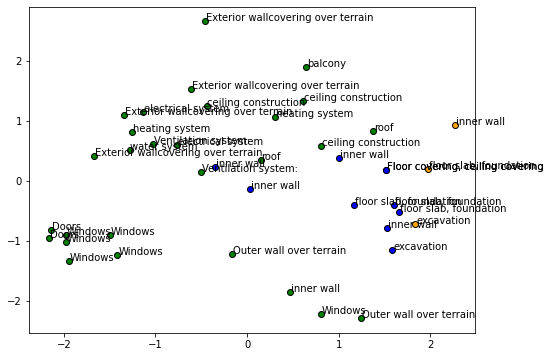

In [32]:
#@title
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(ft_doc_features)
labels = ap.labels_
categories = list(df['Type'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-2, y+1e-2), xytext=(0, 0), 
                 textcoords='offset points')

## **Auxilliary content**

In [ ]:
#@title
# card.style.format(precision=0, na_rep='MISSING', thousands=" ",
#                 formatter={('Decision Tree', 'Tumour'): "{:.2f}",
#                            ('Regression', 'Non-Tumour'): lambda x: "$ {:,.1f}".format(x*-1e6)
#                           })

In [ ]:
#@title
# def make_pretty(styler):
#     #styler.set_caption("Weather Conditions")
#     #styler.format(rain_condition)
#     styler.format_index(lambda v: v.strftime("%A"))
#     styler.format_column(lambda v: v.strftime("%A"))
#     styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
#     return styler

# card.style.pipe(make_pretty)

In [33]:
#@title
# weather_df = pd.DataFrame(np.random.rand(10,2)*5,
#                           index=pd.date_range(start="2021-01-01", periods=10),
#                           columns=["Tokyo", "Beijing"])

# def rain_condition(v):
#     if v < 1.75:
#         return "Dry"
#     elif v < 2.75:
#         return "Rain"
#     return "Heavy Rain"

# def make_pretty(styler):
#     styler.set_caption("Weather Conditions")
#     styler.format(rain_condition)
#     styler.format_index(lambda v: v.strftime("%A"))
#     styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
#     return styler

# weather_df

In [ ]:
#@title
# weather_df.loc["2021-01-04":"2021-01-08"].style.pipe(make_pretty)

In [ ]:
#@title
# from anytree import Node, RenderTree
# from anytree.exporter import DotExporter
# ceo = Node("CEO") #root
# vp_1 = Node("VP_1", parent=ceo)
# vp_2 = Node("VP_2", parent=ceo)
# gm_1 = Node("GM_1", parent=vp_1)
# gm_2 = Node("GM_2", parent=vp_2)
# m_1 = Node("M_1", parent=gm_2)
# DotExporter(ceo).to_picture("ceo.png")